#1.モデルの準備

In [1]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [2]:
import itertools
import os

import matplotlib.pylab as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
import random
import os

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score

import tensorflow as tf
import tensorflow_hub as hub
from tensorflow._api.v2 import image

import time

def set_seed(seed=1):
    tf.random.set_seed(seed)
    # optional
    # for numpy.random
    np.random.seed(seed)
    # for built-in random
    random.seed(seed)
    # for hash seed
    os.environ["PYTHONHASHSEED"] = str(seed)
set_seed(1)

print('TF version:', tf.__version__)
print('Hub version:', hub.__version__)
print('Phsical devices:', tf.config.list_physical_devices())

TF version: 2.7.0
Hub version: 0.12.0
Phsical devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


#2.データセットの準備

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
sab_path = "/content/drive/MyDrive/techno_pro/submit/sample_submit.tsv"
sab_df = pd.read_csv(sab_path, delimiter='\t', header=None)
sab_df.head()

,0,1
0,test_0000,0
1,test_0001,0
2,test_0002,0
3,test_0003,0
4,test_0004,0


In [5]:
image_size = 224
batch_size = 1

In [6]:
data_dir = "/content/drive/MyDrive/techno_pro/data/test/"
    
datagen_kwargs = dict(rescale=1./255)
dataflow_kwargs = dict(target_size=(image_size, image_size),
                       batch_size=batch_size,
                       interpolation="bilinear")

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    samplewise_center = True,
    samplewise_std_normalization=True,
    **datagen_kwargs)
test_generator = test_datagen.flow_from_directory(
    data_dir, subset="training", shuffle=False, **dataflow_kwargs)

Found 2300 images belonging to 1 classes.


#保存済みモデルの使用

In [7]:
model_path = '1641306635_efficientnetv2-b0_32batch_5epoch' # @param ['1641131363_efficientnetv2-b3_32batch_2epoch', '1641184059_efficientnetv2-s_8batch_5epoch', '1641275676_efficientnetv2-s_16batch_5epoch', '1641278891_efficientnetv2-b0_32batch_5epoch', '1641301894_efficientnetv2-b0_32batch_5epoch', '1641306635_efficientnetv2-b0_32batch_5epoch']
export_path = './drive/MyDrive/techno_pro/saved_model/' + model_path
reloaded = tf.keras.models.load_model(export_path)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


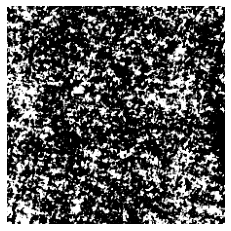

In [36]:
x, y = next(test_generator)
image = x[0, :, :, :]
plt.imshow(image)
plt.axis('off')
plt.show()
image = np.expand_dims(image, axis=0)

In [37]:
start = time.time()
prediction_scores = reloaded.predict(image)
end = time.time()
print("prediction time: ", end-start)

prediction time:  0.11072111129760742


In [38]:
print(prediction_scores)
predicted_index = np.argmax(prediction_scores)
print("Predicted label: " + str(predicted_index))

[[0.5744599 0.3434029]]
Predicted label: 0
